# Astro Project

In [1]:
# Imports and parameter setting

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import astropy_mpl_style


%matplotlib inline
plt.style.use(astropy_mpl_style)
# width = 3.404
# height = width * 1
# params = {
#     'xtick.labelsize':8,
#     'ytick.labelsize':8,
#     'axes.labelsize':8,
#     'legend.fontsize':8,
#     'font.family':'serif',
# }
# mpl.rcParams.update(params)

In [2]:
# Get data
try:
    hdulist = fits.open('data/m35.fit')
except FileNotFoundError:
    print('Data file missing')

In [3]:
data = pd.DataFrame(hdulist[1].data)
isochrone = pd.DataFrame(hdulist[3].data)

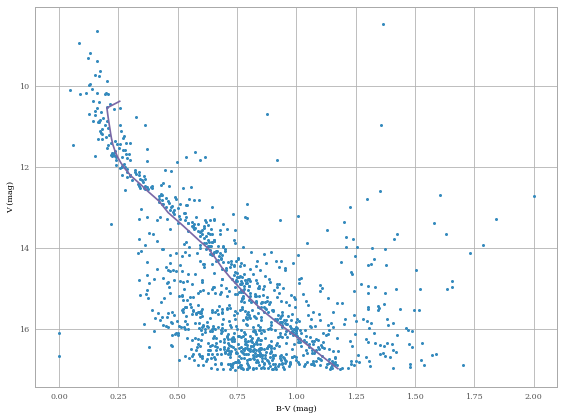

In [31]:
isochrone['V'] = isochrone['Mv']+9.6+.255*3.086
isochrone['B-V(cor)'] = isochrone['B-V']+.255
mask = isochrone['V'] < max(data['Vmag'])

plt.plot(data['B-V'], data['Vmag'], 'o', ms=2)
plt.plot(isochrone['B-V(cor)'], isochrone['V'].where(mask), 'C1')
plt.gca().invert_yaxis()
plt.xlabel('B-V (mag)')
plt.ylabel('V (mag)')


# plt.gcf().set_size_inches(width, height)
plt.tight_layout()
plt.gcf().savefig('figs/b-v.pdf')

AttributeError: Unknown property ms

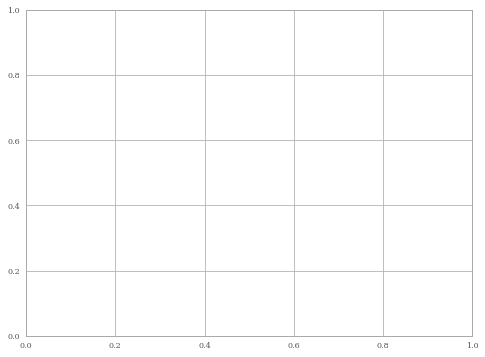

In [28]:
ax = data.plot.scatter(x='V-I', y='Vmag', style='o', ms=1)
ax.invert_yaxis()
ax.set_xlabel('V-I (mag)')
ax.set_ylabel('V (mag)')

# plt.gcf().set_size_inches(width, height)
plt.tight_layout()
plt.gcf().savefig('figs/v-i.pdf')

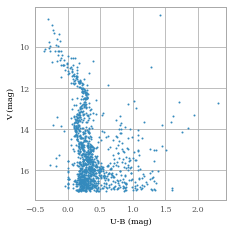

In [25]:
ax = data.plot.scatter(x='U-B', y='Vmag', **ppars)
ax.invert_yaxis()
ax.set_xlabel('U-B (mag)')
ax.set_ylabel('V (mag)')

plt.gcf().set_size_inches(width, height)
plt.tight_layout()
plt.gcf().savefig('figs/u-b.pdf')

In [7]:
# hdulist.close()